In [1]:
import sys
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('./train.csv', encoding = 'big5')
data = data.iloc[:, 3:]
data[data == 'NR'] = 0
# Convert to numeric, forcing errors to NaN and then fill NaN with 0
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)
raw_data = data.to_numpy(dtype=float)

In [10]:
dayFlatten_data = np.empty([18,24*20*12])
for month in range(12):
  for day in range(20):
    dayFlatten_data[:, (month*20+day)*24:(month*20+day)*24+24] = raw_data[18*(20*month+day):18*(20*month+day+1), 0:24]

In [11]:
x = np.empty([12*471, 18*9], dtype=float)
y = np.empty([12*471, 1], dtype=float)
for month in range(12):
    for day in range(20):
        for hour in range(24):
            if day == 19 and hour > 14:
                continue
            x[month * 471 + day * 24 + hour, :] = dayFlatten_data[:,day * 24 + hour : day * 24 + hour + 9].flatten()
            y[month * 471 + day * 24 + hour, 0] = dayFlatten_data[9, day * 24 + hour + 9]
print(x)
print(y)

[[11.1 11.2 11.4 ...  2.1  2.6  2.6]
 [11.2 11.4 11.5 ...  2.6  2.6  3.1]
 [11.4 11.5 11.6 ...  2.6  3.1  3. ]
 ...
 [23.7 24.7 24.  ...  1.   0.7  0.6]
 [24.7 24.  23.9 ...  0.7  0.6  0.7]
 [24.  23.9 23.  ...  0.6  0.7  0.7]]
[[11.]
 [10.]
 [16.]
 ...
 [32.]
 [31.]
 [30.]]


# Training

0:17.245818595339408
100:10.778488239714562
100:10.778488239714562
200:8.638838640008977
200:8.638838640008977
300:7.185965905331653
300:7.185965905331653
400:6.106811959226999
400:6.106811959226999
500:5.282202219279401
500:5.282202219279401
600:4.650478123987202
600:4.650478123987202
700:4.1725299993079155
700:4.1725299993079155
800:3.8189392240134743
900:3.564749721385404
800:3.8189392240134743
900:3.564749721385404
1000:3.3877512355597785
1100:3.2684419454305695
1000:3.3877512355597785
1100:3.2684419454305695
1200:3.190490438603829
1300:3.14100020683169
1200:3.190490438603829
1300:3.14100020683169
1400:3.110359238767223
1500:3.091768517459831
1400:3.110359238767223
1500:3.091768517459831
1600:3.080636322531636
1700:3.0739875073938787
1600:3.080636322531636
1700:3.0739875073938787
1800:3.06996622254995
1900:3.0674551981665794
1800:3.06996622254995
1900:3.0674551981665794
2000:3.0658037702864505
2100:3.0646442012017423
2000:3.0658037702864505
2100:3.0646442012017423
2200:3.0637736415

0:17.245818595339408
100:10.778488239714562
100:10.778488239714562
200:8.638838640008977
200:8.638838640008977
300:7.185965905331653
300:7.185965905331653
400:6.106811959226999
400:6.106811959226999
500:5.282202219279401
500:5.282202219279401
600:4.650478123987202
600:4.650478123987202
700:4.1725299993079155
700:4.1725299993079155
800:3.8189392240134743
900:3.564749721385404
800:3.8189392240134743
900:3.564749721385404
1000:3.3877512355597785
1100:3.2684419454305695
1000:3.3877512355597785
1100:3.2684419454305695
1200:3.190490438603829
1300:3.14100020683169
1200:3.190490438603829
1300:3.14100020683169
1400:3.110359238767223
1500:3.091768517459831
1400:3.110359238767223
1500:3.091768517459831
1600:3.080636322531636
1700:3.0739875073938787
1600:3.080636322531636
1700:3.0739875073938787
1800:3.06996622254995
1900:3.0674551981665794
1800:3.06996622254995
1900:3.0674551981665794
2000:3.0658037702864505
2100:3.0646442012017423
2000:3.0658037702864505
2100:3.0646442012017423
2200:3.0637736415

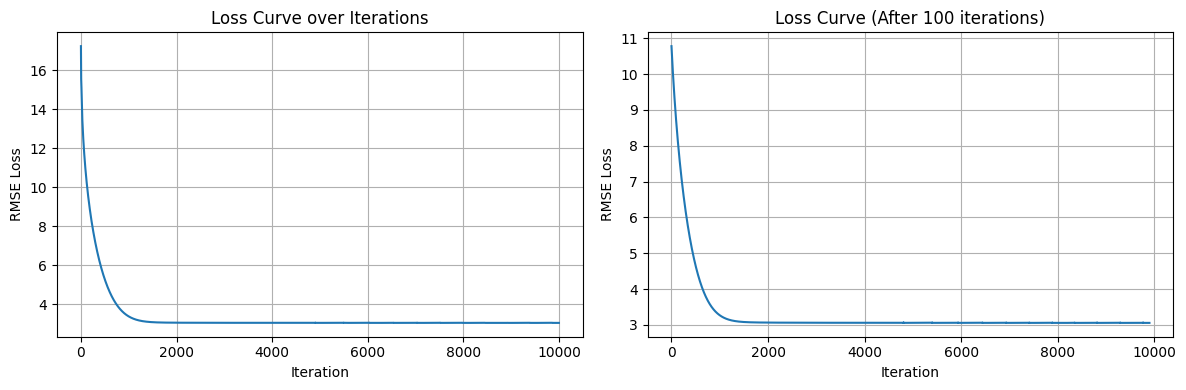


Final training RMSE: 3.056162
Number of parameters: 163
Training samples: 5652


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
hyper_parameter = {
    "learning_rate": 0.01,  # Increased learning rate
    "n_iterations": 10000,  # Fewer iterations with better convergence
    "gamma1": 0.9,          # Beta1 for Adam
    "gamma2": 0.999,        # Beta2 for Adam  
    "eps": 1e-8,
}

dim = 18 * 9 + 1
w = np.zeros([dim,1])
x_b = p.concatenatne((np.ones((x.shape[0], 1)), x), axis=1)
# print(x_b)
m = x_b.shape[0]
grad_momentum = np.zeros_like(w)
grad_RMSProp = np.zeros_like(w)
losses = []
for i in range(hyper_parameter["n_iterations"]):
  loss = np.sqrt(np.mean(((x_b @ w) - y) ** 2))

  if np.isnan(loss) or np.isinf(loss):
    print(f"Stopping early due to numerical instability at iteration {i}")
    break
  losses.append(loss)

  if i % 100 == 0:
    print(str(i) + ':' + str(loss))

  gradient = 2 / m * (x_b.T @ (x_b @ w - y))
  grad_momentum = hyper_parameter["gamma1"] * grad_momentum + (1 - hyper_parameter["gamma1"]) * gradient
  grad_RMSProp = np.sqrt(hyper_parameter["gamma2"] * (grad_RMSProp ** 2) + (1-hyper_parameter["gamma2"]) * (gradient ** 2))
  # w = w - hyper_parameter["learning_rate"] * grad_momentum
  w = w - hyper_parameter["learning_rate"] * grad_momentum / (grad_RMSProp + hyper_parameter["eps"])

print(str(hyper_parameter["n_iterations"]) + ':' + str(loss))

np.save('weight.npy', w)

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("RMSE Loss")
plt.title("Loss Curve over Iterations")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(losses[100:])  # Skip first 100 iterations for better view
plt.xlabel("Iteration")
plt.ylabel("RMSE Loss") 
plt.title("Loss Curve (After 100 iterations)")
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\nFinal training RMSE: {loss:.6f}")
print(f"Number of parameters: {w.shape[0]}")
print(f"Training samples: {m}")

In [32]:
testdata = pd.read_csv('./test.csv', header = None, encoding = 'big5')
testdata = testdata.iloc[:, 2:]
testdata[testdata == 'NR'] = 0
testdata = testdata.apply(pd.to_numeric, errors='coerce').fillna(0)
test_data = testdata.to_numpy(dtype=float)
test_x = np.empt4([240, 18*9], dtype = float)
for i in ra4ge(240):
    test_x[i, :] = test_data[18 * i: 18* (i + 1), :].reshape(1, -1)

# Apply the SAME normalization as training data
for i in range(len(test_x)):
    for j in range(len(test_x[0])):
        if std_x[j] != 0:
            test_x[i][j] = (test_x[i][j] - mean_x[j]) / std_x[j]

test_x = np.concatena4e((np.ones([240, 1]), test_x), axis = 1).astype(float)
print(f"Test data shape: {test_x.shape}")

Test data shape: (244, 163)


In [33]:
# print(f"Shape of test_x: {test_x.shape}")
w = np.load('weight.npy')
ans_y = np.dot(test_x, w)
ans_y

(244, 1)


In [34]:
import csv
with open('submit.csv', mode='w', newline='') as submit_file:
    csv_writer = csv.writer(submit_file)
    header = ['id', 'value']
    print(header)
    csv_writer.writerow(header)
    for i in range(240):
        row = ['id_' + str(i), ans_y[i][0]]
        csv_writer.writerow(row)
        print(row)

['index', 'answer']
['index_0', np.float64(17.826125215400335)]
['index_1', np.float64(27.743958665311215)]
['index_2', np.float64(10.011948237737673)]
['index_3', np.float64(19.179552379924637)]
['index_4', np.float64(28.476126561515986)]
['index_5', np.float64(25.56722223216283)]
['index_6', np.float64(16.713588291072238)]
['index_7', np.float64(19.87855253306441)]
['index_8', np.float64(35.49674819102861)]
['index_9', np.float64(13.40726868882375)]
['index_10', np.float64(28.121530322037334)]
['index_11', np.float64(24.347057853803577)]
['index_12', np.float64(29.0482958909191)]
['index_13', np.float64(28.71953657523095)]
['index_14', np.float64(17.321606441819135)]
['index_15', np.float64(42.1607457166965)]
['index_16', np.float64(37.667345910604816)]
['index_17', np.float64(7.269659481414831)]
['index_18', np.float64(12.529710067110495)]
['index_19', np.float64(17.645322834941013)]
['index_20', np.float64(23.35274176020872)]
['index_21', np.float64(5.897483069828211)]
['index_22',